In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import glob
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
from src.godr.backend.recognizer import Recognizer
rec = Recognizer()

In [3]:
path = "bug_1.png"

In [4]:
def to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

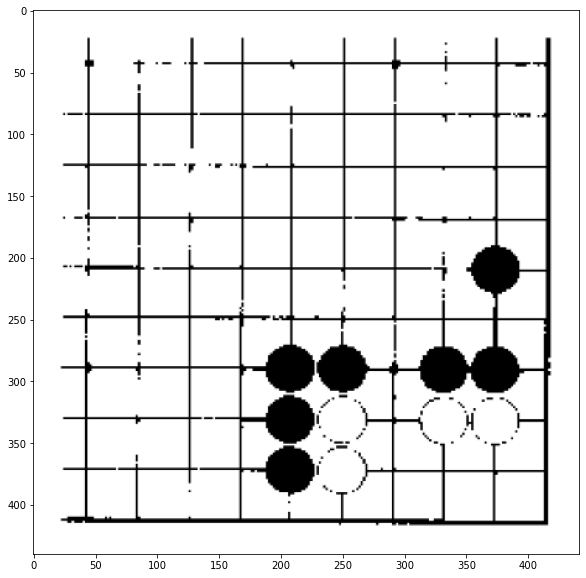

In [5]:
img = cv2.imread(path, cv2.IMREAD_COLOR)
plt.imshow(to_RGB(img))
plt.show()

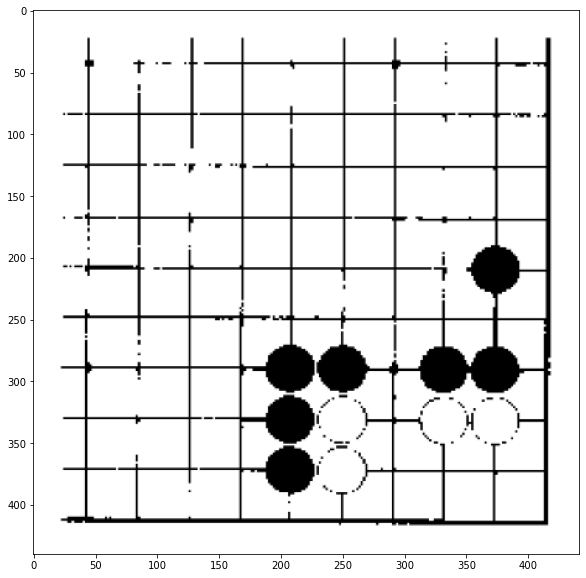

In [6]:
img = rec.align_board(img)
plt.imshow(to_RGB(img))
plt.show()

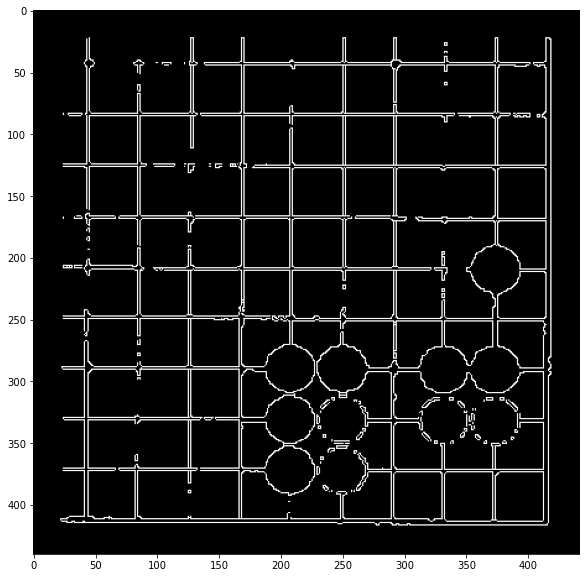

In [7]:
edges = rec.canny_edges(img)
plt.imshow(to_RGB(edges))
plt.show()

In [8]:
def get_aligned_img(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    return rec.align_board(img)

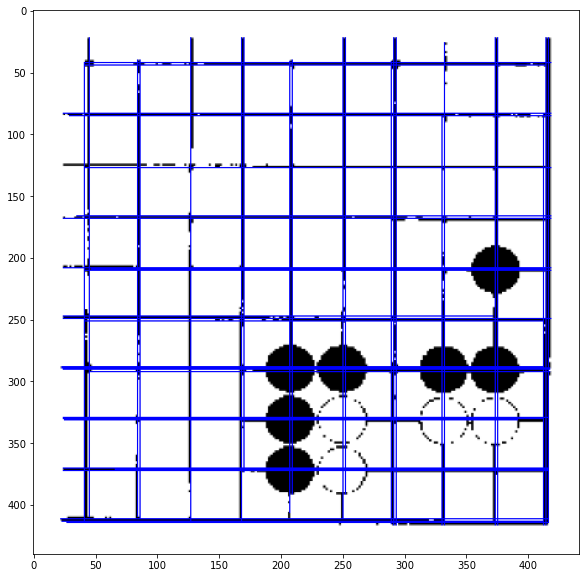

In [9]:
lines = rec.all_lines(edges, 50)
img = get_aligned_img(path)
for line in lines:
    x1, y1, x2, y2 = line
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)
plt.imshow(to_RGB(img))
plt.show()

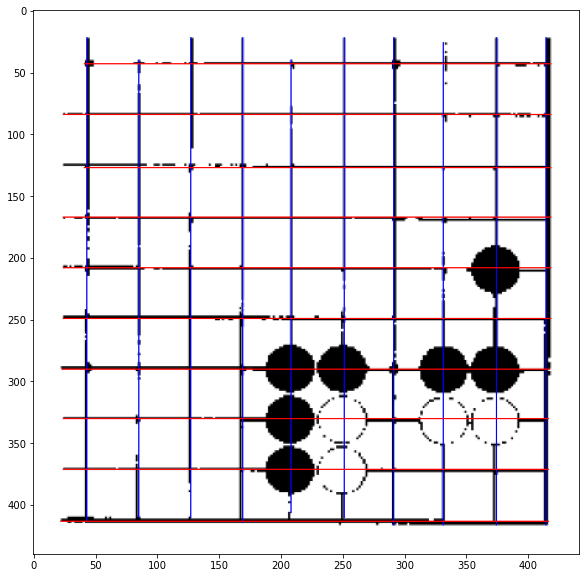

In [10]:
img = get_aligned_img(path)
v_lines, h_lines =  rec.verticals_horizontals(edges, 40)
for line in v_lines:
    x1, y1, x2, y2 = line
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)
for line in h_lines:
    x1, y1, x2, y2 = line
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
plt.imshow(to_RGB(img))
plt.show()

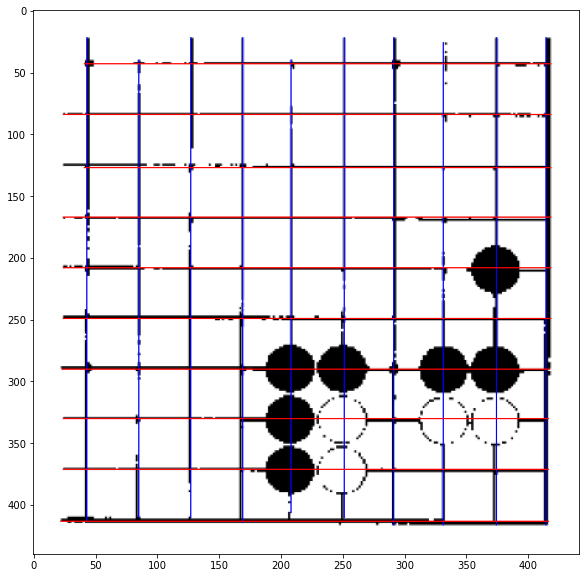

In [11]:
img = get_aligned_img(path)
v_lines, h_lines = rec.lines_recognition(edges)
for line in v_lines:
    x1, y1, x2, y2 = line
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)
for line in h_lines:
    x1, y1, x2, y2 = line
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
plt.imshow(to_RGB(img))
plt.show() 

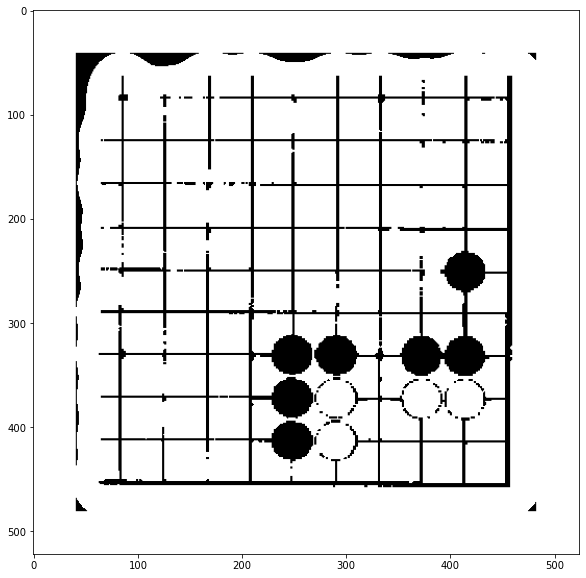

In [12]:
img = get_aligned_img(path)
intersections = rec.find_intersections(v_lines, h_lines)
cell_size = rec.get_cell_size(v_lines, h_lines)
board_img_nn = rec.transform_for_nn(img, cell_size)
plt.imshow(to_RGB(board_img_nn))
plt.show()

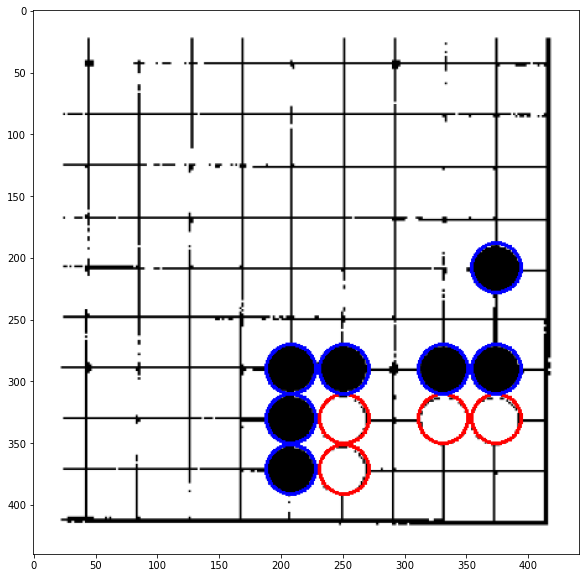

In [13]:
white_stones, black_stones = rec.nn_stone_recognizer.recognize(board_img_nn, cell_size, intersections + cell_size)
radius = cell_size//2

img = get_aligned_img(path)
for loc_stone in white_stones:
    stone = intersections[loc_stone]
    cv2.circle(img ,(stone[0],stone[1]), radius,(0,0,255),2)
for loc_stone in black_stones:
    stone = intersections[loc_stone]
    cv2.circle(img ,(stone[0],stone[1]), radius,(255,0,0),2)

plt.imshow(to_RGB(img))
plt.show()

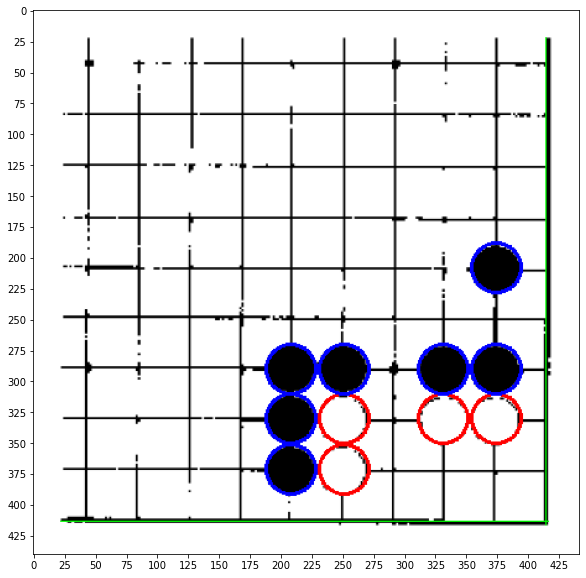

In [14]:
board_edges = rec.find_board_edges(v_lines, h_lines, white_stones + black_stones, cell_size)
up_edge, down_edge, left_edge, right_edge = board_edges
if up_edge:
    line = h_lines[0]
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 1)
if down_edge:
    line = h_lines[-1]
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 1)
if left_edge:
    line = v_lines[0]
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 1)
if right_edge:
    line = v_lines[-1]
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 1)

plt.imshow(to_RGB(img))
plt.yticks(np.arange(0, img.shape[0], 25))
plt.xticks(np.arange(0, img.shape[1], 25))
plt.show() 